In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

In [37]:
df = pd.read_excel('../data/NBAStats.xlsx').set_index('PLAYER')
df = df[df['GP'] >= 10]
# Perhaps a poor practice and should remove them in the scraping algorithm
df = df.drop(columns=['TEAM', 'W', 'L', 'GP', 'DREB', 'STL', 'BLK'])
df = df.astype(float)

Removes the team column from the dataframe for now. It may be added back for future analysis but as a string it causes problems for the clustering algorithm. Also dropping players who have played less than 10 games because the sample size is so small.

In [38]:
dfPlayerCol = df.reset_index()
df

,AGE,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,...,FGM%UAST,DEF RTG,%DREB,STL%,%BLK,OPP PTSOFF TOV,OPP PTS2ND CHANCE,OPP PTSFB,OPP PTSPAINT,DEFWS
PLAYER,,,,,,,,,,,,,,,,,,,,,
Anthony Black,20.0,24.1,105.4,104.6,0.8,24.2,1.61,25.8,2.0,9.1,...,53.8,104.6,14.2,20.4,20.0,9.6,5.6,6.6,21.4,0.118
Moritz Wagner,27.0,18.8,106.1,107.0,-0.9,13.5,0.86,10.9,6.7,20.1,...,25.0,107.0,31.3,20.2,15.0,7.7,4.4,5.3,17.2,0.081
Ayo Dosunmu,24.0,30.7,112.4,118.6,-6.2,20.6,3.72,27.8,2.0,10.1,...,31.0,118.6,15.0,17.6,16.7,11.2,9.6,10.1,37.9,0.025
Clint Capela,30.0,22.8,108.3,108.4,-0.1,7.5,1.44,11.5,14.0,23.5,...,22.3,108.4,34.8,12.0,42.5,9.3,6.3,7.8,23.0,0.087
De'Aaron Fox,27.0,37.2,112.8,111.0,1.8,26.5,1.75,19.0,2.9,10.1,...,64.5,111.0,15.3,27.6,7.4,13.2,10.8,8.4,33.6,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jaden Springer,22.0,4.3,70.0,106.5,-36.5,15.0,3.00,16.7,7.1,17.0,...,100.0,106.5,30.8,27.3,0.0,1.3,0.7,2.0,4.6,0.019
Kobe Bufkin,21.0,12.4,95.3,103.3,-8.0,21.3,2.13,21.3,3.5,12.3,...,44.4,103.3,17.6,12.5,18.2,5.5,2.7,5.4,11.6,0.066
Robert Williams III,27.0,17.1,109.7,115.7,-6.0,10.9,1.50,17.9,10.6,19.0,...,25.8,115.7,32.1,29.6,42.4,8.9,4.9,6.8,16.8,0.029


In [39]:
features = list(df.columns)
# Removes the column titles for data processing
x = df.loc[:, features].values
# Good practice to scale the data down based on variance
x = StandardScaler().fit_transform(x) 


Feature refers to the data that you are using in ML model to make predictions. Feature engineering is the process of finding the best features for the model. 

In [40]:
variance_list = []
for n_components in range(2,len(df.columns)):
    # Dimensionality Reduction
    pca = PCA(n_components=n_components)
    components = pca.fit_transform(x)
    variance = sum(pca.explained_variance_ratio_)
    variance_list.append(variance)
    print(f"Variance with {n_components} components: {variance}")


Variance with 2 components: 0.40846642163274177
Variance with 3 components: 0.5264967652389363
Variance with 4 components: 0.6126088096081483
Variance with 5 components: 0.6632729389697366
Variance with 6 components: 0.7099738656675407
Variance with 7 components: 0.7479676227855767
Variance with 8 components: 0.7761894392912648
Variance with 9 components: 0.8020664084770888
Variance with 10 components: 0.8270045148181692
Variance with 11 components: 0.8480544734628561
Variance with 12 components: 0.868631658609084
Variance with 13 components: 0.8886125770981588
Variance with 14 components: 0.9052757292720619
Variance with 15 components: 0.9201745343538676
Variance with 16 components: 0.9347431521703157
Variance with 17 components: 0.9465734155068629
Variance with 18 components: 0.9577089348017902
Variance with 19 components: 0.9680628208556089
Variance with 20 components: 0.9740338986207736
Variance with 21 components: 0.9790439510439467
Variance with 22 components: 0.9834475129936469


This helps determine how much variance in the dataset is captured as the number of components increases. This will aid in choosing the ideal number of components for dimensionality reduction.

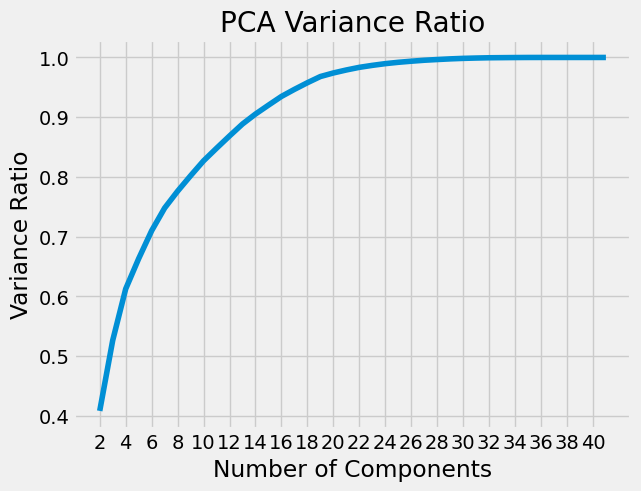

In [41]:
#Useful graph for visualization of ratio changes
plt.style.use('fivethirtyeight')
pca_fig, ax = plt.subplots()
ax.plot(range(2,len(df.columns)), variance_list)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('PCA Variance Ratio')
pca_fig.savefig('../images/PCA_Variance_Ratio.png')

In [42]:
from numpy import diff
diff_variance = diff(variance_list)
print(diff_variance)

[1.18030344e-01 8.61120444e-02 5.06641294e-02 4.67009267e-02
 3.79937571e-02 2.82218165e-02 2.58769692e-02 2.49381063e-02
 2.10499586e-02 2.05771851e-02 1.99809185e-02 1.66631522e-02
 1.48988051e-02 1.45686178e-02 1.18302633e-02 1.11355193e-02
 1.03538861e-02 5.97107777e-03 5.01005242e-03 4.40356195e-03
 3.30600315e-03 2.88433576e-03 2.25544501e-03 1.82042091e-03
 1.61578128e-03 1.20502731e-03 1.08596774e-03 8.51411182e-04
 5.69244159e-04 4.45682090e-04 1.98876523e-04 1.76747076e-04
 1.13480340e-04 2.36103719e-05 3.87315775e-07 6.08230915e-08
 5.32518019e-09 6.29908792e-10 0.00000000e+00]


This calculates the difference between consecutive elements in the variance_list array. Slope calculus, used to determine the "elbow point" in PCA which is where the rate of variance slows down

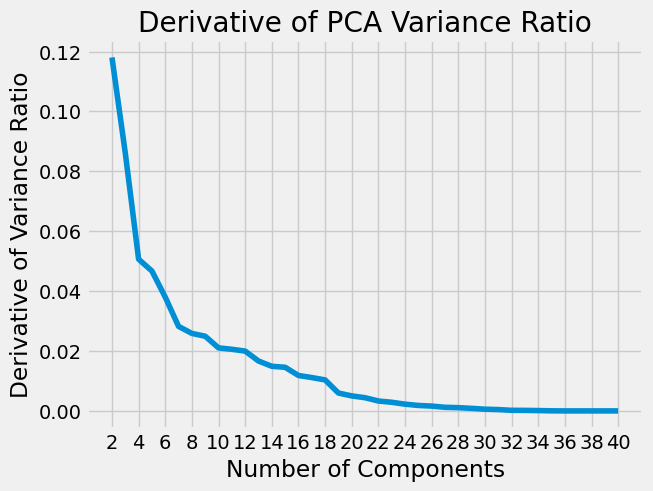

In [43]:
pca_deriv, ax = plt.subplots()
ax.plot(range(2, len(df.columns) - 1), diff_variance)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Derivative of Variance Ratio')
ax.set_xticks(np.arange(2, len(df.columns), 2))
ax.set_title('Derivative of PCA Variance Ratio')
pca_deriv.savefig('../images/PCA_Derivative.png')

Good data should have a high PCA Variance Ratio along with a low Derivative of the Variance Ratio. By using both criteria, you balance data representativeness (high variance ratio) and computational efficiency (low derivative).

In [44]:
n_comp = 16
pca = PCA(n_components=n_comp)

# Reducing the dimensions of the data
components = pca.fit_transform(x)

pca_df = pd.DataFrame(data = components, columns = [f'PC{i}' for i in range(1, n_comp + 1)])

pca_df['PLAYER'] = dfPlayerCol['PLAYER']
pca_df = pca_df[['PLAYER'] + [f'PC{i}' for i in range(1, n_comp + 1)]]
pca_df

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.20900707 0.19945935 0.11803034 0.08611204 0.05066413 0.04670093
 0.03799376 0.02822182 0.02587697 0.02493811 0.02104996 0.02057719
 0.01998092 0.01666315 0.01489881 0.01456862]
0.9347431521703157


In [45]:
x = np.column_stack([pca_df[f'PC{i}'] for i in range(1, n_comp)])

# We want a high silhouette score along with meaningful analysis
silhouette = []

for n_clusters in range(2, 32):
    kmeans = KMeans(n_clusters=n_clusters, random_state = 1)
    cluster_labels = kmeans.fit_predict(x)
    centers = kmeans.cluster_centers_
    score = silhouette_score(x, cluster_labels)
    silhouette.append(score)
    print(f"Silhouette Score with {n_clusters} clusters: {score}")

Silhouette Score with 2 clusters: 0.20507657331049678
Silhouette Score with 3 clusters: 0.1772986460622235
Silhouette Score with 4 clusters: 0.13585306120077756
Silhouette Score with 5 clusters: 0.12000873913754456
Silhouette Score with 6 clusters: 0.12612570152696057
Silhouette Score with 7 clusters: 0.11772472052122458
Silhouette Score with 8 clusters: 0.10636480195468077
Silhouette Score with 9 clusters: 0.1069234742577703
Silhouette Score with 10 clusters: 0.1044069560244969
Silhouette Score with 11 clusters: 0.09762952739558399
Silhouette Score with 12 clusters: 0.09291152596812924
Silhouette Score with 13 clusters: 0.08544754325604988
Silhouette Score with 14 clusters: 0.08265495026582949
Silhouette Score with 15 clusters: 0.07884830749093044
Silhouette Score with 16 clusters: 0.08129202857953705
Silhouette Score with 17 clusters: 0.07849827882566039
Silhouette Score with 18 clusters: 0.07877877757931503
Silhouette Score with 19 clusters: 0.07790038174318777
Silhouette Score with

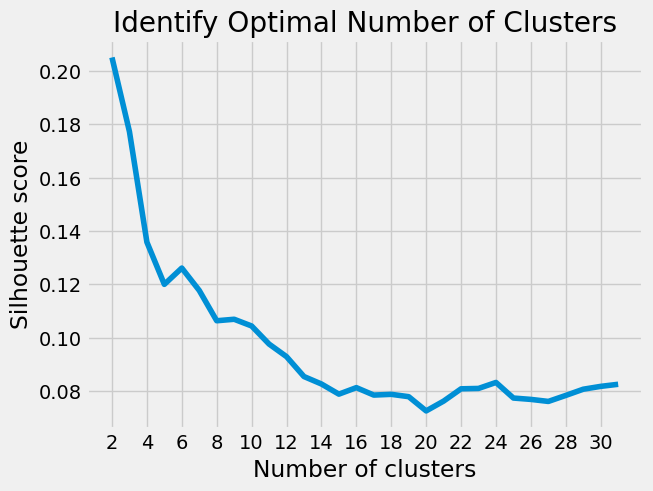

In [46]:
plt.style.use('fivethirtyeight')
silhouette_fig, ax = plt.subplots()
ax.plot(range(2,2 + len(silhouette)), silhouette)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette score')
ax.set_xticks(np.arange(2, 2+len(silhouette), 2))
ax.set_title('Identify Optimal Number of Clusters')
silhouette_fig.savefig('../images/Optimal_Clusters.png')

In [47]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1-silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print(f"for n_cluseter = {i + 2}, improvement = {improvement}") 

for n_cluseter = 3, improvement = -0.03494415476463675
for n_cluseter = 4, improvement = -0.05037743606847234
for n_cluseter = 5, improvement = -0.018335217486564748
for n_cluseter = 6, improvement = 0.0069511626552073436
for n_cluseter = 7, improvement = -0.009613489057196611
for n_cluseter = 8, improvement = -0.012875707651306856
for n_cluseter = 9, improvement = 0.0006251681942603948
for n_cluseter = 10, improvement = -0.002817808060940674
for n_cluseter = 11, improvement = -0.007567531564144581
for n_cluseter = 12, improvement = -0.005228452803688999
for n_cluseter = 13, improvement = -0.008228505736494585
for n_cluseter = 14, improvement = -0.0030535077235074315
for n_cluseter = 15, improvement = -0.0041496302574501875
for n_cluseter = 16, improvement = 0.002652897572114732
for n_cluseter = 17, improvement = -0.0030409551683296954
for n_cluseter = 18, improvement = 0.0003043930870766376
for n_cluseter = 19, improvement = -0.0009535123754738084
for n_cluseter = 20, improvement = -0

C:\conda_tmp\ipykernel_18116\1289475222.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


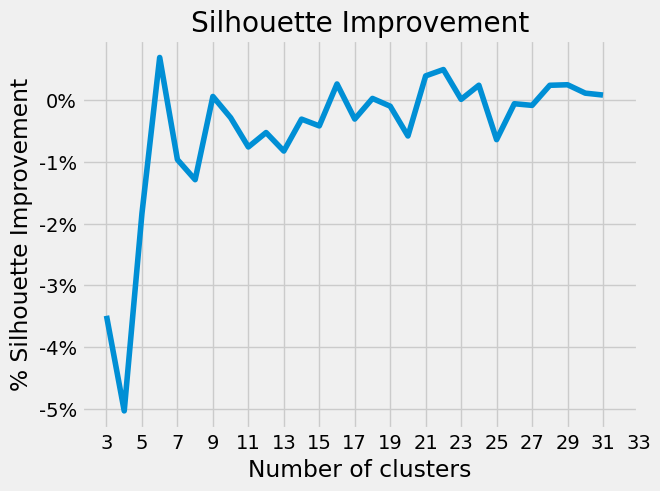

In [48]:
plt.style.use('fivethirtyeight')
silhouette_improvement_fig, ax = plt.subplots()
ax.plot(range(3, 2 + len(silhouette)), silhouette_diff)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('% Silhouette Improvement')
ax.set_xticks(np.arange(3, 4 + len(silhouette), 2))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_title('Silhouette Improvement')
silhouette_fig.savefig('../images/Silhouette_Improvement.png')

In [49]:
kmeans = KMeans(n_clusters = 15, random_state = 1)

kmeans.fit(x)

y_kmeans = kmeans.predict(x)
with open("clusterMode.sav", 'wb') as f:
    pickle.dump(kmeans, f)

In [50]:
df_cluster = pd.DataFrame()

df_cluster['Player'] = dfPlayerCol['PLAYER']
df_cluster['Cluster'] = y_kmeans
df_cluster.head()

,Player,Cluster
0,Anthony Black,5
1,Moritz Wagner,2
2,Ayo Dosunmu,14
3,Clint Capela,6
4,De'Aaron Fox,12


In [51]:
pd.DataFrame.to_excel(df_cluster, '../data/Clustered_Players.xlsx')

Key:

0 - Defensive Big Men

1 - Defensive, Leaning Secondary Ball Handlers

2 - Versatile, Hustle Players

3 - Low Usage Role Players

4 - Offensive Creator Guards

5 - Niche Secondary Creators and Perimeter Defenders

6 - Elite Defensive Big Men

7 - All Around Talented Bigs

8 - Complementary Role Players

9 - Traditional Backup Bigs

10 - Modern Perimeter Archetype

11 - Raw Versatile Wings

12 - Elite Offensive Creators

13 - Bench Scoring Threats

14 - Skilled 3&D Wings